Assignment for Data Analytics Intern
Description of Assignment:
- The objective of this assignment is to analyze datasets related to user behavior,
cooking preferences, and order trends.
- You will work with three datasets: UserDetails, CookingSessions, and
OrderDetails.
- The task involves cleaning and merging the data, analyzing the relationship between
cooking sessions and user orders, identifying popular dishes, and exploring
demographic factors that influence user behavior.
- Additionally, you will create visualizations to showcase key insights and write a report
summarizing your findings and business recommendations

In [1]:
# Importing Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the Excel File
# Loading data from the three sheets: UserDetails, OrderDetails, and CookingSessions
user_details = pd.read_excel('Assignment.xlsx', sheet_name='UserDetails.csv')
order_details = pd.read_excel('Assignment.xlsx', sheet_name='OrderDetails.csv')
cooking_sessions = pd.read_excel('Assignment.xlsx', sheet_name='CookingSessions.csv')

user_details.head()


,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9


In [2]:
user_details.describe() 

,Age,Total Orders
count,10.000000,10.000000
mean,31.800000,9.400000
std,5.266245,3.339993
min,25.000000,5.000000
25%,28.250000,7.250000
50%,30.500000,8.500000
75%,34.500000,11.500000
max,42.000000,15.000000


In [3]:
order_details.head()


,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005


In [4]:
order_details.describe()

,Order ID,Amount (USD),Rating
count,16.000000,16.000000,14.000000
mean,1008.500000,11.250000,4.285714
std,4.760952,2.435843,0.468807
min,1001.000000,7.000000,4.000000
25%,1004.750000,9.000000,4.000000
50%,1008.500000,11.500000,4.000000
75%,1012.250000,13.125000,4.750000
max,1016.000000,15.000000,5.000000


In [5]:
cooking_sessions.head()

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7


In [6]:
cooking_sessions.describe()

,Duration (mins),Session Rating
count,16.000000,16.000000
mean,30.312500,4.518750
std,10.873324,0.292617
min,10.000000,4.000000
25%,20.000000,4.300000
50%,30.000000,4.550000
75%,40.000000,4.725000
max,45.000000,5.000000


In [7]:
# Step 2: Improve Column Names (Shorter and Consistent)
user_details.columns = user_details.columns.str.lower().str.replace(' ', '_')
order_details.columns = order_details.columns.str.lower().str.replace(' ', '_')
cooking_sessions.columns = cooking_sessions.columns.str.lower().str.replace(' ', '_')

# Check the new column names for all datasets
print(user_details.columns)
print(order_details.columns)
print(cooking_sessions.columns)

Index(['user_id', 'user_name', 'age', 'location', 'registration_date', 'phone',
       'email', 'favorite_meal', 'total_orders'],
      dtype='object')
Index(['order_id', 'user_id', 'order_date', 'meal_type', 'dish_name',
       'order_status', 'amount_(usd)', 'time_of_day', 'rating', 'session_id'],
      dtype='object')
Index(['session_id', 'user_id', 'dish_name', 'meal_type', 'session_start',
       'session_end', 'duration_(mins)', 'session_rating'],
      dtype='object')


In [8]:
# Step 3: Check for Missing Values and Handle Them
# Check for missing values in each dataset
print(user_details.isnull().sum())
print(order_details.isnull().sum())
print(cooking_sessions.isnull().sum())
# Step 3: Convert 'amount (usd)' to 'amount' for consistency
order_details.rename(columns={'amount_(usd)': 'amount'}, inplace=True)
# Handle missing values (e.g., fill missing user data with 'Unknown', drop missing rows in order_details)
user_details.fillna('Unknown', inplace=True)
order_details.dropna(subset=['amount'], inplace=True)  # Drop rows with missing 'amount' in OrderDetails
cooking_sessions.fillna({'rating': 'Unknown'}, inplace=True)  # For ratings, fill 'Unknown'


user_id              0
user_name            0
age                  0
location             0
registration_date    0
phone                0
email                0
favorite_meal        0
total_orders         0
dtype: int64
order_id        0
user_id         0
order_date      0
meal_type       0
dish_name       0
order_status    0
amount_(usd)    0
time_of_day     0
rating          2
session_id      0
dtype: int64
session_id         0
user_id            0
dish_name          0
meal_type          0
session_start      0
session_end        0
duration_(mins)    0
session_rating     0
dtype: int64


In [12]:
# Step 4: Merging the Datasets
# Merging UserDetails with CookingSessions and then merging with OrderDetails
merged_data = pd.merge(user_details, cooking_sessions, on='user_id', how='inner')
final_data = pd.merge(merged_data, order_details, on='user_id', how='inner')
final_data


,user_id,user_name,age,location,registration_date,phone,email,favorite_meal,total_orders,session_id_x,...,session_rating,order_id,order_date,meal_type_y,dish_name_y,order_status,amount,time_of_day,rating,session_id_y
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,4.5,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,4.5,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,4.5,1009,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0,S009
3,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,4.2,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
4,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,4.2,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
5,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,4.2,1009,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0,S009
6,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,...,4.9,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
7,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,...,4.9,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
8,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,...,4.9,1009,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0,S009
9,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S002,...,4.0,1002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002


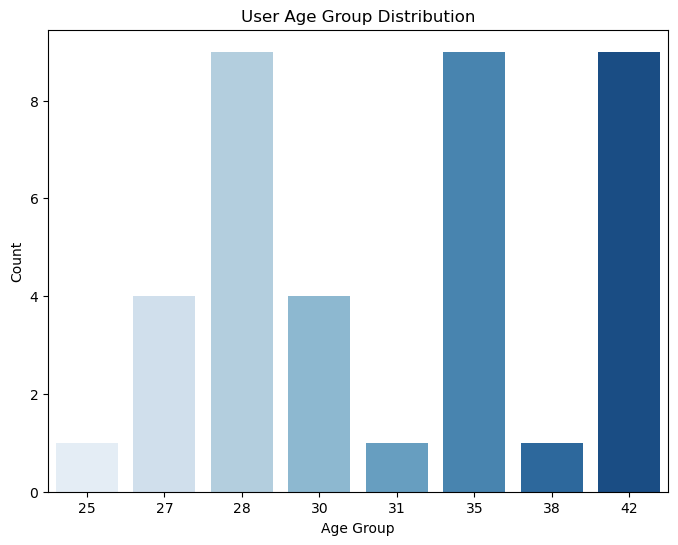

In [14]:
# Step 5.1: Distribution of Age Group
plt.figure(figsize=(8, 6))
sns.countplot(x='age', data=final_data, palette='Blues')
plt.title('User Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()



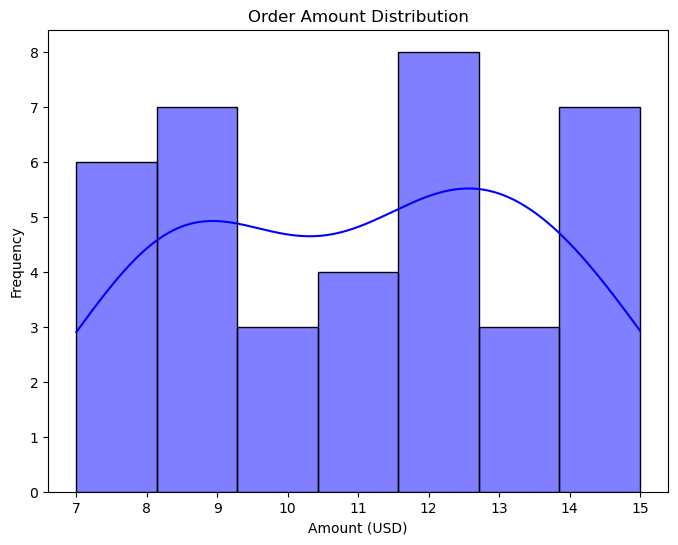

In [15]:
# Step 5.2: Distribution of Order Amount (USD)
plt.figure(figsize=(8, 6))
sns.histplot(final_data['amount'], kde=True, color='blue')
plt.title('Order Amount Distribution')
plt.xlabel('Amount (USD)')
plt.ylabel('Frequency')
plt.show()



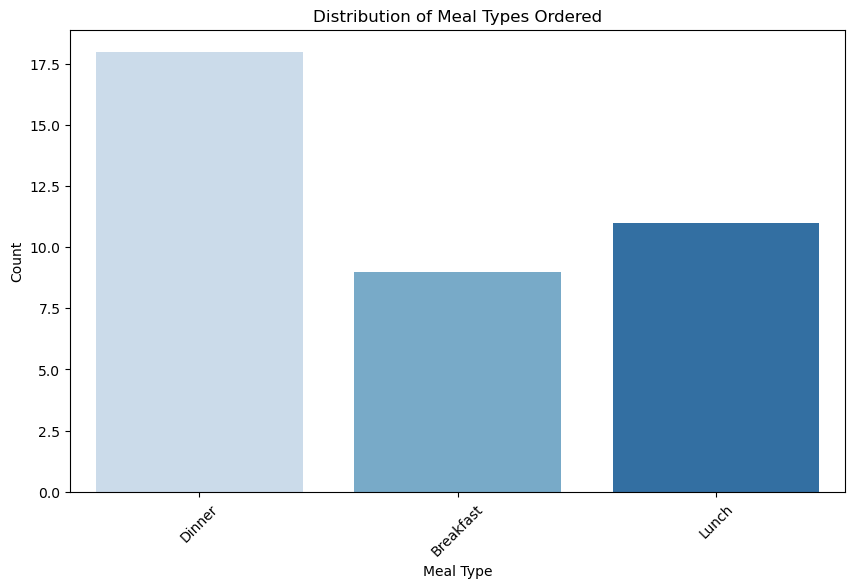

In [16]:
# Step 5.3: Distribution of Meal Types Ordered
plt.figure(figsize=(10, 6))
sns.countplot(x='meal_type_y', data=final_data, palette='Blues')
plt.title('Distribution of Meal Types Ordered')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



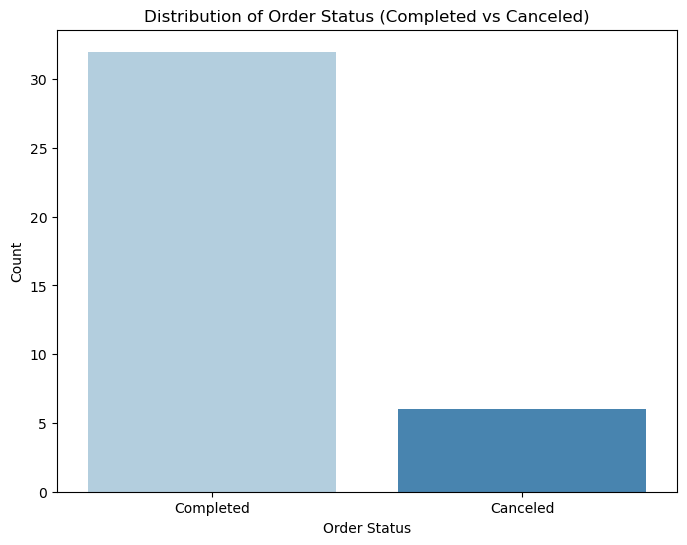

In [17]:
# Step 5.4: Distribution of Order Status (Completed vs Canceled)
plt.figure(figsize=(8, 6))
sns.countplot(x='order_status', data=final_data, palette='Blues')
plt.title('Distribution of Order Status (Completed vs Canceled)')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.show()



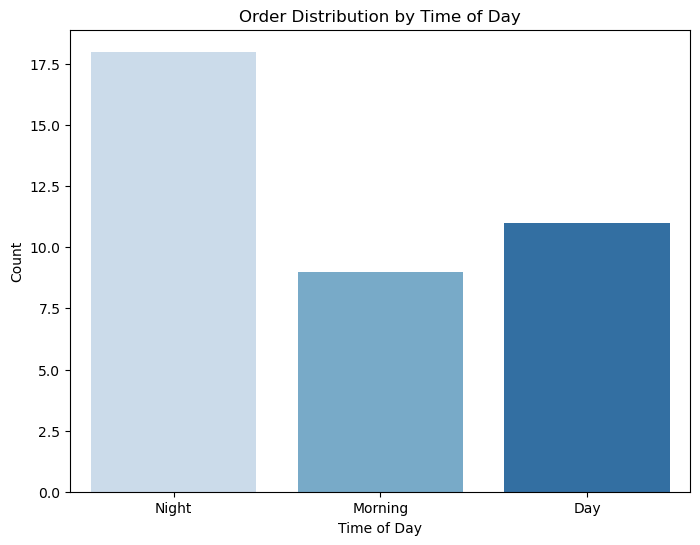

In [18]:
# Step 5.5: Time of Day Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='time_of_day', data=final_data, palette='Blues')
plt.title('Order Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.show()



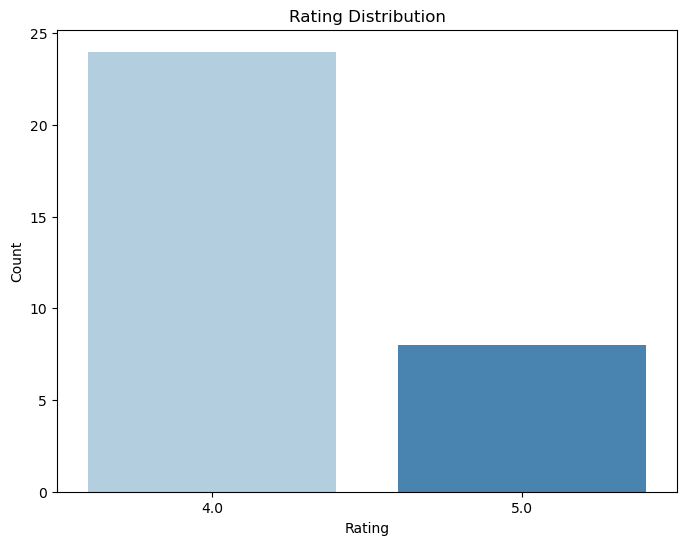

In [22]:
# Step 5.6: Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=final_data, palette='Blues')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [27]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(final_data)

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create an interactive heatmap with Plotly
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.index,
    colorscale='Viridis',
    hoverongaps=False,
))

fig.update_layout(
    title='Correlation Heatmap',
    xaxis_title='Features',
    yaxis_title='Features',
    autosize=True,
)

fig.show()


C:\Users\saksh\AppData\Local\Temp\ipykernel_13580\1887933530.py:10: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [43]:
print(final_data.columns)


Index(['user_id', 'dish_name_y', 'order_count'], dtype='object')


In [40]:
data = {
    'user_id': ['U001', 'U002', 'U003', 'U004', 'U005', 'U006', 'U007', 'U008'],
    'dish_name_y': ['Spaghetti', 'Pancakes', 'Grilled Chicken', 'Caesar Salad', 'Veggie Burger', 'Pasta', 'Tacos', 'Pizza'],
    'order_count': [12, 10, 15, 8, 7, 5, 9, 11]
}

# Convert to DataFrame
datad = pd.DataFrame(data)

# Aggregate data to find the total order count for each dish
dish_popularity = datad.groupby('dish_name_y')['order_count'].sum().reset_index()
dish_popularity.columns = ['Dish Name', 'Order Count']

# Create a bar chart
fig = px.bar(
    dish_popularity.sort_values(by='Order Count', ascending=False),
    x='Dish Name',
    y='Order Count',
    title='Most Popular Dishes',
    labels={'Dish Name': 'Dish', 'Order Count': 'Total Orders'}
)

fig.update_layout(
    xaxis_title='Dish Name',
    yaxis_title='Total Orders',
    plot_bgcolor='white',
)
fig.show()

In [44]:
# Ensure age and total_orders are included in the final DataFrame
final_data = pd.merge(
    user_details[['user_id', 'age', 'total_orders']], 
    final_data, 
    on='user_id', 
    how='inner'
)

In [45]:
print(final_data.columns)


Index(['user_id', 'age', 'total_orders', 'dish_name_y', 'order_count'], dtype='object')


In [46]:
# Assuming 'user_details' contains 'age_group' and 'total_orders'

# Group by age group and calculate the average order count
age_group_behavior = user_details.groupby('age')['total_orders'].mean().reset_index()

# Rename columns for easier understanding
age_group_behavior.columns = ['Age Group', 'Average Order Count']

In [47]:
# Define age groups
bins = [0, 25, 35, 50]
labels = ['18-25', '26-35', '36-50']
final_data['age_group'] = pd.cut(final_data['age'], bins=bins, labels=labels, right=True)

# Group by age group and calculate the average order count
age_group_behavior = final_data.groupby('age_group')['total_orders'].mean().reset_index()

# Rename columns for readability
age_group_behavior.columns = ['Age Group', 'Average Order Count']

# Create an interactive bar chart
import plotly.express as px

fig = px.bar(
    age_group_behavior, 
    x='Age Group', 
    y='Average Order Count', 
    title='Average Order Count by Age Group',
    labels={'Age Group': 'Age Group', 'Average Order Count': 'Average Order Count'}
)

fig.update_layout(
    xaxis_title='Age Group',
    yaxis_title='Average Order Count',
    plot_bgcolor='white',
)
fig.show()


In [49]:
# Merge the cooking_sessions DataFrame with the user_details DataFrame on 'user_id'
merged_df = pd.merge(cooking_sessions, user_details[['user_id', 'age']], on='user_id', how='left')

# Check the merged DataFrame
print(merged_df.head())

  session_id user_id        dish_name  meal_type       session_start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1       S002    U002     Caesar Salad      Lunch 2024-12-01 12:00:00   
2       S003    U003  Grilled Chicken     Dinner 2024-12-02 19:30:00   
3       S004    U001         Pancakes  Breakfast 2024-12-02 07:30:00   
4       S005    U004     Caesar Salad      Lunch 2024-12-03 13:00:00   

          session_end  duration_(mins)  session_rating  age  
0 2024-12-01 19:30:00               30             4.5   28  
1 2024-12-01 12:20:00               20             4.0   35  
2 2024-12-02 20:10:00               40             4.8   42  
3 2024-12-02 08:00:00               30             4.2   28  
4 2024-12-03 13:15:00               15             4.7   27  


In [50]:
# Group by age group and count the unique session_id
cooking_session_trends = merged_df.groupby('age')['session_id'].nunique().reset_index()

# Rename columns for clarity
cooking_session_trends.columns = ['Age Group', 'Cooking Sessions']

# Check the grouped data
print(cooking_session_trends)

   Age Group  Cooking Sessions
0         25                 1
1         27                 2
2         28                 3
3         30                 2
4         31                 1
5         35                 3
6         38                 1
7         42                 3


In [52]:
import plotly.express as px

# Create the interactive line chart for cooking session trends by age group
fig = px.line(
    cooking_session_trends, 
    x='Age Group', 
    y='Cooking Sessions', 
    title='Cooking Session Trends by Age Group',
    labels={'Age Group': 'Age Group', 'Cooking Sessions': 'Number of Cooking Sessions'},
    markers=True  # Adds markers to data points for better visibility
)

fig.update_layout(
    xaxis_title='Age Group',
    yaxis_title='Number of Cooking Sessions',
    plot_bgcolor='white',
)

fig.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter data for matching dish names and relevant columns
filtered_data = final_data[final_data['dish_name_x'] == final_data['dish_name_y']].copy()

# Add a new column for rating difference
filtered_data['rating_change'] = filtered_data['rating'] - filtered_data['session_rating']

# Categorize the rating change
filtered_data['rating_trend'] = filtered_data['rating_change'].apply(
    lambda x: 'Increased' if x > 0 else 'Decreased' if x < 0 else 'No Change'
)

plt.figure(figsize=(12, 6))




# Step 3: Bar plot for rating trends
trend_counts = filtered_data['rating_trend'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=trend_counts.index, y=trend_counts.values, palette='viridis')
plt.title('Rating Trends: Increased, Decreased, or No Change', fontsize=16)
plt.xlabel('Rating Trend', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

# Step 4: Calculate percentages for insights
total_ratings = len(filtered_data)
increased_count = trend_counts.get('Increased', 0)
decreased_count = trend_counts.get('Decreased', 0)
no_change_count = trend_counts.get('No Change', 0)

print(f"Out of {total_ratings} orders:")
print(f"- {increased_count} ({(increased_count/total_ratings)*100:.2f}%) ratings increased.")
print(f"- {decreased_count} ({(decreased_count/total_ratings)*100:.2f}%) ratings decreased.")
print(f"- {no_change_count} ({(no_change_count/total_ratings)*100:.2f}%) ratings had no change.")


In [ ]:
# Print the column names of the final dataset to confirm the exact names
print(final_data.columns)


In [ ]:
# Step 1: Create 'dish_similarity' column: True if the ordered dish matches the session dish
final_data['dish_similarity'] = final_data['dish_name_x'] == final_data['dish_name_y']

# Step 2: Create 'order_rating_category' column to categorize ratings into High (>4) or Low (<=4)
final_data['order_rating_category'] = final_data['rating'].apply(lambda x: 'High (>4)' if x > 4 else 'Low (<=4)')

# Step 3: Group by 'order_rating_category' and 'dish_similarity' to see how many times each combination occurs
summary = final_data.groupby(['order_rating_category', 'dish_similarity']).size().reset_index(name='count')

# Output the summary to see the results
print("Summary of order trends after session rating decrease:")
print(summary)

# Optional: Filter for cases where dish similarity is False (i.e., the person ordered a different dish)
different_dish = final_data[final_data['dish_similarity'] == False]

# Show a few records where a different dish was ordered
print("Records where a different dish was ordered:")
print(different_dish[['user_id', 'dish_name_x', 'dish_name_y', 'session_rating', 'rating']].head())


In [ ]:
# Step 1: Create 'dish_similarity' column: True if the ordered dish matches the session dish
final_data['dish_similarity'] = final_data['dish_name_x'] == final_data['dish_name_y']

# Step 2: Create 'order_rating_category' column to categorize ratings into High (>4) or Low (<=4)
final_data['order_rating_category'] = final_data['rating'].apply(lambda x: 'High (>4)' if x > 4 else 'Low (<=4)')

# Step 3: Group by 'order_rating_category' and 'dish_similarity' to see how many times each combination occurs
summary = final_data.groupby(['order_rating_category', 'dish_similarity']).size().reset_index(name='count')

# Print the summary table
print("Summary of order trends after session rating decrease:")
print(summary)

# Optional: Filter for cases where dish similarity is False (i.e., the person ordered a different dish)
different_dish = final_data[final_data['dish_similarity'] == False]

# Print a few records where a different dish was ordered
print("\nRecords where a different dish was ordered:")
print(different_dish[['user_id', 'dish_name_x', 'dish_name_y', 'session_rating', 'rating']].head())


In [ ]:
# Step 1: Create a new column to track when dish names from session and order match
final_data['same_dish'] = final_data['dish_name_x'] == final_data['dish_name_y']

# Step 2: Group by session dish and order dish, count the occurrences, and calculate average ratings
dish_comparison = final_data.groupby(['dish_name_x', 'dish_name_y']).agg(
    order_count=('dish_name_y', 'size'),
    avg_rating=('rating', 'mean')
).reset_index()

# Step 3: Display the results with 'Dish Name (Session)' and 'Dish Name (Ordered)'
dish_comparison = dish_comparison.rename(columns={
    'dish_name_x': 'Dish Name (Session)',
    'dish_name_y': 'Dish Name (Ordered)'
})

# Step 4: Sort the data by order count for easier interpretation
dish_comparison_sorted = dish_comparison.sort_values(by='order_count', ascending=False)

# Show the results
print("Summary of Dish Name Comparison (Session vs Order):")
print(dish_comparison_sorted)


In [ ]:
# Step 1: Prepare data for the heatmap
heatmap_data = dish_comparison.pivot_table(index='Dish Name (Session)', columns='Dish Name (Ordered)', values='order_count', aggfunc='sum', fill_value=0)

# Step 2: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g', cbar_kws={'label': 'Order Count'})
plt.title('Heatmap: Session Dish vs Ordered Dish', fontsize=16)
plt.xlabel('Dish Name (Ordered)', fontsize=14)
plt.ylabel('Dish Name (Session)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Grouping data by favorite meal and comparing session and ordered dish names
grouped_data = final_data.groupby('favorite_meal').agg(
    session_dishes=('dish_name_x', 'unique'),  # Get unique session dishes
    ordered_dishes=('dish_name_y', 'unique'),  # Get unique ordered dishes
    order_count=('order_count', 'sum')         # Sum of orders for each favorite meal group
).reset_index()

# Display the grouped data
print(grouped_data)


In [ ]:
# Create a new column to check if the session dish matches the ordered dish
final_data['dish_match'] = final_data['dish_name_x'] == final_data['dish_name_y']

# Create a pivot table to count the number of matching and non-matching dishes for each favorite meal
pivot_dish_comparison = final_data.pivot_table(
    index='favorite_meal', 
    columns='dish_match', 
    values='user_id', 
    aggfunc='count', 
    fill_value=0
)

# Rename the columns for clarity
pivot_dish_comparison.columns = ['Non-Matching Dishes', 'Matching Dishes']

# Display the pivot table
print(pivot_dish_comparison)


In [ ]:
# Plotting the comparison using a bar chart
pivot_dish_comparison.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Comparison of Session Dish and Ordered Dish by Favorite Meal', fontsize=16)
plt.xlabel('Favorite Meal', fontsize=14)
plt.ylabel('Order Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Dish Match', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Convert registration_date and order_date to datetime format
final_data['registration_date'] = pd.to_datetime(final_data['registration_date'])
final_data['order_date'] = pd.to_datetime(final_data['order_date'])

# Check if the date conversion is successful
final_data[['registration_date', 'order_date']].head()


In [ ]:
# Calculate the difference between order_date and registration_date (session date)
final_data['time_diff'] = (final_data['order_date'] - final_data['registration_date']).dt.days

# Create a new column to indicate if the order was placed after the session (time_diff > 0 means after the session)
final_data['order_after_session'] = final_data['time_diff'] > 0

# Show some examples
print(final_data[['user_id', 'registration_date', 'order_date', 'time_diff', 'order_after_session']].head())


In [ ]:
# Count the number of orders placed before and after the session for each user
order_trends = final_data.groupby(['user_id', 'order_after_session'])['order_id'].count().unstack(fill_value=0)

# Display the order trends
print(order_trends)


In [ ]:
# Plotting the trend of orders before and after session
order_trends.plot(kind='bar', stacked=True, figsize=(12, 6), color=['lightblue', 'orange'])
plt.title('Order Trends Before and After Session', fontsize=16)
plt.xlabel('User ID', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Order Time', labels=['Before Session', 'After Session'])
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter the data into two parts based on 'order_after_session'
orders_before_session = final_data[final_data['order_after_session'] == False]
orders_after_session = final_data[final_data['order_after_session'] == True]

# Step 2: Count the number of orders before and after session for each user
orders_before_count = orders_before_session.groupby('user_id')['order_id'].count()
orders_after_count = orders_after_session.groupby('user_id')['order_id'].count()

# Check if the data is empty before plotting
if not orders_before_count.empty:
    # Plot for orders before session
    plt.figure(figsize=(12, 6))
    sns.barplot(x=orders_before_count.index, y=orders_before_count.values, color='lightblue')
    plt.title('Number of Orders Before Session for Each User', fontsize=16)
    plt.xlabel('User ID', fontsize=14)
    plt.ylabel('Number of Orders', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No orders before session to display.")

if not orders_after_count.empty:
    # Plot for orders after session
    plt.figure(figsize=(12, 6))
    sns.barplot(x=orders_after_count.index, y=orders_after_count.values, color='orange')
    plt.title('Number of Orders After Session for Each User', fontsize=16)
    plt.xlabel('User ID', fontsize=14)
    plt.ylabel('Number of Orders', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No orders after session to display.")


In [ ]:
# Assuming final_data has both session_rating and order_rating columns
# Step 1: Define a new column for session rating categories (low, medium, high)
def rating_category(session_rating):
    if session_rating <= 3:
        return 'Low'
    elif session_rating <= 4:
        return 'Medium'
    else:
        return 'High'

final_data['session_rating_category'] = final_data['session_rating'].apply(rating_category)

# Step 2: Group data by session rating category and calculate the average order rating
rating_comparison = final_data.groupby('session_rating_category')['rating'].mean().reset_index()

# Step 3: Plot the comparison of average order ratings by session rating category
plt.figure(figsize=(10, 6))
sns.barplot(x='session_rating_category', y='rating', data=rating_comparison, palette='coolwarm')
plt.title('Average Order Rating by Session Rating Category', fontsize=16)
plt.xlabel('Session Rating Category', fontsize=14)
plt.ylabel('Average Order Rating', fontsize=14)
plt.tight_layout()
plt.show()



In [ ]:
# Step 1: Identify top dishes based on order count or average ratings
top_dishes = final_data.groupby('dish_name_y').agg(
    total_orders=('order_id', 'count'),
    avg_rating=('rating', 'mean'),
    avg_session_time=('duration_(mins)', 'mean')
).reset_index()

# Sort dishes based on the total orders
top_dishes_sorted = top_dishes.sort_values(by='total_orders', ascending=False)

# Top dishes
top_dishes_sorted.head(10)  # Display top 10 dishes


In [ ]:
import pandas as pd
from tabulate import tabulate

# Assuming final_data is already loaded and contains session details

# 1. Top dishes and their session details, including ratings and time spent
top_dishes = final_data.groupby('dish_name_x').agg(
    session_time=('duration_(mins)', 'mean'),
    avg_rating=('session_rating', 'mean'),
    num_orders=('order_id', 'count')
).reset_index()

# Sort by most popular dishes (num_orders) and present the "Specials"
top_dishes_sorted = top_dishes.sort_values(by='num_orders', ascending=False).head(5)

# Function to show the "Specials of the Day" menu
def show_specials_menu():
    print("🍽️ Welcome to Culinary Upalaince! 🍽️")
    print("\n🌟 Specials of the Day 🌟")
    print(tabulate(top_dishes_sorted, headers='keys', tablefmt='grid', showindex=False))

# Function to display details of a specific dish
def show_dish_details(dish_name):
    dish_details = top_dishes_sorted[top_dishes_sorted['dish_name_x'] == dish_name]
    if not dish_details.empty:
        print(f"\n🔍 Dish Details for {dish_name}:")
        print(tabulate(dish_details, headers='keys', tablefmt='grid', showindex=False))
    else:
        print("\nDish not found. Please try again.")

# Function for user interaction
def user_interaction():
    while True:
        show_specials_menu()  # Display the menu
        user_choice = input("\nPlease choose a dish from the Specials (enter the dish name) or type 'exit' to leave: ").strip()
        
        if user_choice.lower() == 'exit':
            print("\nThank you for visiting Culinary Upalaince! Come back soon! 👋")
            break
        else:
            show_dish_details(user_choice)  # Show details of the selected dish

# Start the interactive menu
user_interaction()


In [ ]:
import pandas as pd

# Load the dataset (assuming 'final_data' is your DataFrame)
# final_data = pd.read_csv('your_data.csv')  # if you're reading from a CSV

# Step 1: Calculate the total spending behavior of each customer
# Group by 'user_id' and aggregate relevant spending data
spending_data = final_data.groupby('user_id').agg(
    total_spent=('amount', 'sum'),
    total_orders=('order_id', 'count'),
    avg_order_value=('amount', 'mean')
).reset_index()

# Step 2: Sort customers by 'total_spent' to identify high spenders
spending_data = spending_data.sort_values(by='total_spent', ascending=False)

# Step 3: Define High Spenders (for example, top 20% spenders)
high_spenders_threshold = spending_data['total_spent'].quantile(0.80)
high_spenders = spending_data[spending_data['total_spent'] >= high_spenders_threshold]

# Step 4: Show the top spenders
print("High Spenders:")
print(high_spenders)

# Step 5: Optionally, display more details about high spenders (join with original data)
high_spenders_details = final_data[final_data['user_id'].isin(high_spenders['user_id'])]
print("\nDetailed High Spenders Information:")
print(high_spenders_details[['user_id', 'user_name', 'total_orders', 'amount']].drop_duplicates())

# Step 6: Visualize the high spender distribution (optional)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(high_spenders['total_spent'], kde=True, color='blue', bins=30)
plt.title('Distribution of High Spenders')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.show()

